In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud 

In [2]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
data = train.append(test, ignore_index=True,sort=True)

In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [5]:
# remove twitter handles (@user)
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")

In [6]:
# remove special characters, numbers, punctuations
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [7]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [8]:
data.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [9]:
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [10]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [11]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['tidy_tweet'] = tokenized_tweet

In [12]:
all_words = ' '.join([text for text in data['tidy_tweet']]) 

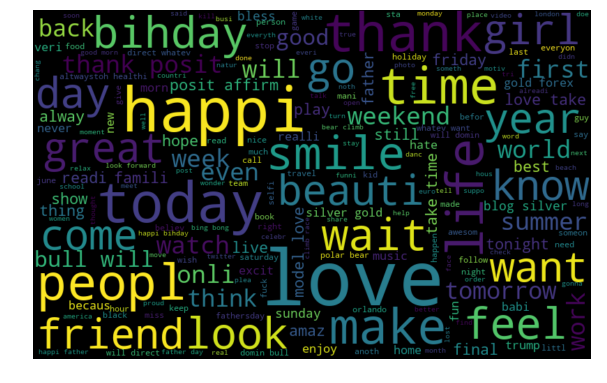

In [13]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

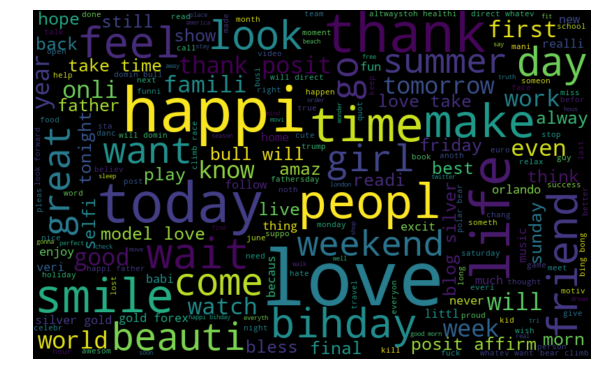

In [14]:
normal_words =' '.join([text for text in data['tidy_tweet'][data['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

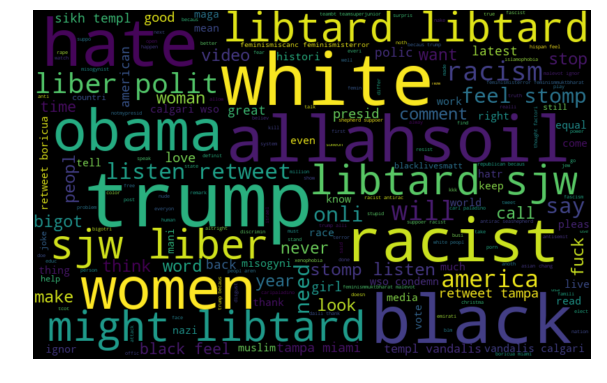

In [15]:
negative_words = ' '.join([text for text in data['tidy_tweet'][data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [16]:
# USe of Hashtags
# function to collect hashtags
def hashtag_extract(x): 
    hashtags = []    
    for i in x:   
        ht = re.findall(r"#(\w+)", i)   
        hashtags.append(ht)    
    return hashtags

In [17]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(data['tidy_tweet'][data['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(data['tidy_tweet'][data['label'] == 1]) 

In [18]:
print(len(HT_negative))

2242
